In [1]:
# Probability method

import math
from math import comb

P = 0
for k in range (12,25):
    p_k = comb(k, 24-k)*(0.5**k)
    P += p_k    

P

0.6666666865348816

In [2]:
# Symbolic method (2 sided)

import sympy as sp
from sympy.abc import m, x, y, z, k, n

M = sp.solve(m**2-0.5*m-0.5, m)
x, y = sp.symbols("x,y")
A = sp.Matrix([[M[0], M[1]], [M[0]**2, M[1]**2]])
b = sp.Matrix([1, 0.5])
C, = sp.linsolve((A, b), x, y)

def an(k):
    return sum(C[i]*M[i]**k for i in range(2))

an(n)

-0.666666666666667*(-0.5)**n + 0.666666666666667*1.0**n

In [3]:
an(25)

0.666666686534882

In [4]:
# Numerical method (2 sided)

import numpy as np
from scipy import linalg as LA

n=25

A= np.array([[0.5, 0.5],[1,0]])

lam, P = LA.eig(A)
Diag = np.diag(lam**(n-1))
Pinv = LA.inv(P)
Init = np.array([0.5,1])

M = P@Diag@Pinv@Init
M[1]

(0.6666666865348816+0j)

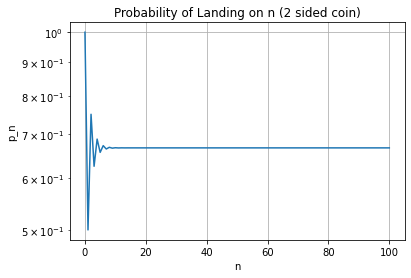

0.6666666865348816
0.6666666666666667


In [5]:
# Plot recurrence relation (2 sided)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1,0.5])
for i in np.arange(2,101):
    a = 0.5*A[i-1]+0.5*A[i-2]
    A = np.append(A,a)

plt.semilogy(A)
plt.xlabel('n')
plt.ylabel('p_n')
plt.title('Probability of Landing on n (2 sided coin)')
plt.grid('on')
plt.show()

print(A[24])  # p_25
print(A[100])

In [6]:
# Symbolic method (3 sided)

import sympy as sp
from sympy.abc import m, x, y, z, k, n

M = sp.solve(m**3-0.5*m**2-0.5*m-0.5, m)
x, y = sp.symbols("x,y")
A = sp.Matrix([[M[0], M[1], M[2]], [M[0]**2, M[1]**2, M[2]**2], [M[0]**3, M[1]**3, M[2]**3]])
b = sp.Matrix([1, 1/3, 4/9])
C, = sp.linsolve((A, b), x, y, z)

def an(n):
    return sum(C[i]*M[i]**n for i in range(3))

an(k)

0.313119152175872*1.23375192852826**k + (-0.378781798310158 + 0.322682052510919*I)*(-0.366875964264129 - 0.520259438865201*I)**k + (-0.378781798310158 - 0.322682052510919*I)*(-0.366875964264129 + 0.520259438865201*I)**k

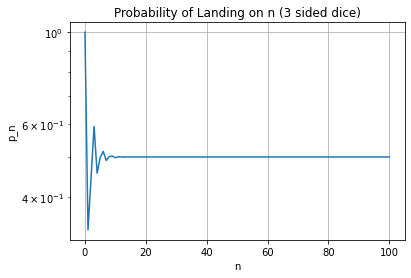

0.4999994424113636
0.4999999999999987


In [7]:
# Plot recurrence relation (3 sided)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1,1/3,4/9])
for i in np.arange(3,101):
    a = (1/3)*A[i-1]+(1/3)*A[i-2]+(1/3)*A[i-3]
    A = np.append(A,a)

plt.semilogy(A)
plt.xlabel('n')
plt.ylabel('p_n')
plt.title('Probability of Landing on n (3 sided dice)')
plt.grid('on')
plt.show()

print(A[24])
print(A[100])

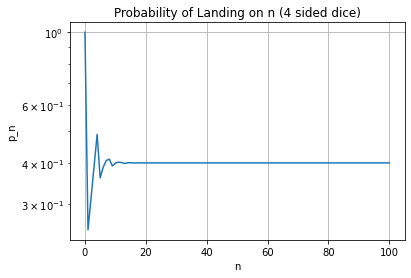

0.39999238267585113
0.4


In [8]:
# Plot recurrence relation (4 sided)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1,1/4,5/16, 25/64])
for i in np.arange(4,101):
    a = (1/4)*A[i-1]+(1/4)*A[i-2]+(1/4)*A[i-3]+(1/4)*A[i-4]
    A = np.append(A,a)

plt.semilogy(A)
plt.xlabel('n')
plt.ylabel('p_n')
plt.title('Probability of Landing on n (4 sided dice)')
plt.grid('on')
plt.show()

print(A[24])
print(A[100])

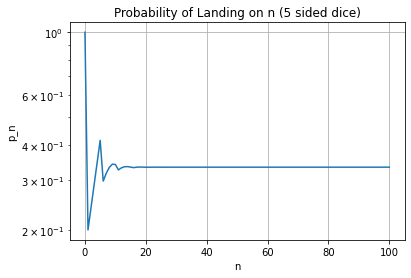

0.33333848737651905
0.33333333333333387


In [9]:
# Plot recurrence relation (5 sided)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1,1/5,6/25,36/125,216/625])
for i in np.arange(5,101):
    a = (1/5)*A[i-1]+(1/5)*A[i-2]+(1/5)*A[i-3]+(1/5)*A[i-4]+(1/5)*A[i-5]
    A = np.append(A,a)

plt.semilogy(A)
plt.xlabel('n')
plt.ylabel('p_n')
plt.title('Probability of Landing on n (5 sided dice)')
plt.grid('on')
plt.show()

print(A[24])
print(A[100])